<a href="https://colab.research.google.com/github/ankitoscar/handsonml/blob/main/chapter_11/chapter_material.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building an image classifier using the Sequential API 
Here, we will make an image classifier using keras' Sequential API. The image classifier would be made for the Fashion MNIST dataset which has 70,000 grayscales of different fashion items having size 28 x 28.

In [1]:
# Importing libraries 
import tensorflow as tf 
from tensorflow import keras 
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [2]:
# Loading the Fashion MNIST dataset 
fashion_mnist = keras.datasets.fashion_mnist # Utility function for loading 
                                             # common dataset 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
                                            # Splitting data into train and test

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Shapes and datatype of dataset 
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [4]:
# Dividing the full training dataset to a train and valid set with scaling 
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255
                  # Dividing by 255 to scale the input 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
# Making labels list 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
class_names[y_train[0]] # Class of y_train[0]

'Coat'

In [6]:
# Making the neural network using Sequential API 
model = keras.models.Sequential() # Initialising the model 
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) # Output layer

In [7]:
# Summary of the model showing layers, types, trainable and non-trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compiling the model 
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

In [9]:
# Training and evaluating the model 
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.0085 - accuracy: 0.6771 - val_loss: 0.5098 - val_accuracy: 0.8328
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5102 - accuracy: 0.8236 - val_loss: 0.4546 - val_accuracy: 0.8428
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4499 - accuracy: 0.8408 - val_loss: 0.4078 - val_accuracy: 0.8628
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4186 - accuracy: 0.8546 - val_loss: 0.4126 - val_accuracy: 0.8562
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4074 - accuracy: 0.8557 - val_loss: 0.3851 - val_accuracy: 0.8654
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3848 - accuracy: 0.8660 - val_loss: 0.3767 - val_accuracy: 0.8666
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3712 - accuracy: 0.8711 - val_loss: 0.3647 - val_accuracy:

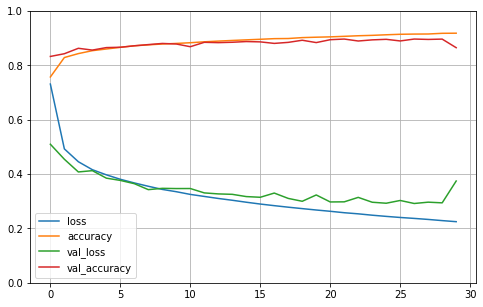

In [10]:
# Plotting the parameters of the trained model 

# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe of the history object 
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set vertical range from 0-1
plt.show()

In [11]:
# Evaluating the model 
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 71.5840 - accuracy: 0.8386


[71.58397674560547, 0.8385999798774719]

The model has performed with an accuracy of 86% on the test set, which shows that the model is able to generalise easily.

In [12]:
# Predicting on data using the model 

# Importing numpy 
import numpy as np

print(model.predict(X_test[:3]))
y_pred = model.predict_classes(X_test[:3])
print(np.array(class_names)[y_pred])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['Ankle Boot' 'Pullover' 'Trouser']


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Building a Regression model using the Sequential API
Here, we will make a regression model on the California housing problem using a neural network. This is a simpler dataset as it has only numerical values in stored in columns.

In [13]:
# Importing dataset from Scikit-Learn
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the dataset using utility function 
housing = fetch_california_housing()

# Splitting the data into train, test and valid sets 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data
                                                              , housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Initialising scaler to scale the data 
scaler = StandardScaler() 

# Scaling the data 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [14]:
# Making the model 
model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
        keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=20,
                    validation_data = (X_valid, y_valid))

# Evaluating 
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test[:3])
print(y_pred)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3061 - val_loss: 0.6226
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5687 - val_loss: 0.5330
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4830 - val_loss: 0.4989
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4696 - val_loss: 0.4821
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4198 - val_loss: 0.4749
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4327 - val_loss: 0.4693
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4228 - val_loss: 0.4543
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4140 - val_loss: 0.4506
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4162 - val_loss: 0.4427
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3960 - val_loss: 0.4417

## Building complex models using the Functional API
Keras also has another API called Functional API, which can be used to create non-sequential models. Here, we will make one such model using it.

### Wide and Deep Network
This neural network tries to create two paths between input and output as to obtain output via a long and a short path.

In [15]:
# Making a wide and deep network 
_input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(_input_) # Using Functional API
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([_input_, hidden2]) # Creating long and short path
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[_input_], outputs=[output])

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [17]:
# Compiling the model 
model.compile(loss='mean_squared_error', optimizer='sgd')

# Training the model 
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 5.9959 - val_loss: 9.8144
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 2.6658 - val_loss: 109.4731
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [========================

In [18]:
# Predicting on test data 
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test[:3])
print(y_pred)

162/162 [==============================] - 0s 918us/step - loss: nan
[[nan]
 [nan]
 [nan]]


We can also configure the neural network to take different subsets of features in different paths and then give the output.

In [19]:
# Making a network to take different features in different paths 
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [20]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
____________________________________________________________________________________________

In [21]:
# Compiling the model 
model.compile(loss='mse', optimizer='sgd')

# Modifying input shapes of data 
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# Training the model 
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A,X_valid_B), y_valid))
# Evaluating 
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4294 - val_loss: 0.5394
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4656 - val_loss: 0.5009
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4437 - val_loss: 0.6258
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4638 - val_loss: 0.4991
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4361 - val_loss: 0.4641
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4341 - val_loss: 0.4584
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3909 - val_loss: 0.4478
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3917 - val_loss: 0.4545
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3656 - val_loss: 0.4376
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3786 - val_loss: 0.4350

In [22]:
# Making a neural network to give more than one output 
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2) # auxilary output 
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [23]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           210         input_5[0][0]                    
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
____________________________________________________________________________________________

In [24]:
# Compiling the model 
model.compile(loss = ['mse', 'mse'],loss_weights=[0.9, 0.1], optimizer = 'sgd')

# Training the model 
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid])
)

# Getting all losses
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

print(total_loss, main_loss, aux_loss)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5352 - dense_13_loss: 1.4590 - dense_14_loss: 2.2218 - val_loss: 0.8521 - val_dense_13_loss: 0.7951 - val_dense_14_loss: 1.3656
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6071 - dense_13_loss: 0.5437 - dense_14_loss: 1.1785 - val_loss: 0.7211 - val_dense_13_loss: 0.6779 - val_dense_14_loss: 1.1102
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5771 - dense_13_loss: 0.5357 - dense_14_loss: 0.9503 - val_loss: 0.5562 - val_dense_13_loss: 0.5095 - val_dense_14_loss: 0.9765
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4789 - dense_13_loss: 0.4438 - dense_14_loss: 0.7949 - val_loss: 0.5160 - val_dense_13_loss: 0.4807 - val_dense_14_loss: 0.8339
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4562 - dense_13_loss: 0.4275 - dense_14_loss: 0.7149 - val_loss: 0.5141 - val_dense_13_loss: 0.4853 - val_de

## Building a model using Subclassing API
In, this method we can wrap our model around a class which can help us to do operations on it like loops, if-statements, etc.

In [25]:
# Building a model with Subclassing API
class WideAndDeep(keras.models.Model):
  def __init__(self, units=30, activation='relu', **kwargs): # constructor
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs 
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    
    return main_output, aux_output

model = WideAndDeep()

## Callbacks and Tensorboard

### Callbacks 
Callbacks are used to analyse a neural network at different stages of training. Callbacks can be used to save the model at different stages as well as to perform early stopping.

In [26]:
# Making a neural network with model saving and early stopping callbacks 
# Making the model 
model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
        keras.layers.Dense(1)
])

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Making callbacks 
checkpoint_cb = keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True) # Model saving 
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data = (X_valid, y_valid))

# Evaluating 
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test[:3])
print(y_pred)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.2923 - val_loss: 0.6700
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5641 - val_loss: 0.4876
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5880 - val_loss: 0.4757
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4294 - val_loss: 0.4594
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4276 - val_loss: 0.4392
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3951 - val_loss: 0.4482
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3838 - val_loss: 0.4265
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3852 - val_loss: 0.4242
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3718 - val_loss: 0.4362
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3839 - val_lo

In [27]:
# Custom callback for showing val_loss/loss at the end of epoch 
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs['val_logs'] / logs['loss']))

### Tensorboard 
Tensorboard is a graphical tool provided by Tensorflow to visualise the performance of our neural network. It does this by taking the logs generated during the training process.


In [28]:
# Creating log directory returning function 
import os
import time 

root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

In [33]:
# Making a model with tensorboard callback 
# Making the model 
model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
        keras.layers.Dense(1)
])

# Logs directory 
run_logdir = get_run_logdir()

# Making tensorboard callback 
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid),
                    callbacks=[tensorboard_cb])


Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.0984 - val_loss: 0.8784
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5734 - val_loss: 0.7877
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5800 - val_loss: 0.4954
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4576 - val_loss: 0.4754
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4373 - val_loss: 0.4572
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4170 - val_loss: 0.4493
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3982 - val_loss: 0.4435
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4045 - val_loss: 0.4420
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3872 - val_loss: 0.4433
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3897 - val_loss: 0.4374

UsageError: Line magic function `%tensorboard` not found.
